In [1]:
"""Copyright 2023 Anish Aradhey

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the “Software”), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to 
permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE."""

In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting
import matplotlib.animation as animation # for GIFs

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from datetime import date

from ipynb.fs.full.MyFunctions_00 import *

In [3]:
# Import data tables with all of the AllWISE/NEOWISE W1 and W2 measurements (many measurements for each object).

voids_full = read_data('voids_full_' + 'new_' + '04-10-23') # timestamp())
walls_full = read_data('walls_full_' + 'new_' + '04-11-23') # timestamp())

read voids_full_new_04-10-23
read walls_full_new_04-11-23


In [4]:
walls_full.head(3)

,nsaid_01,w1mpro,w2mpro,mjd,object_tag,RA
0,464,14.706,14.376,57349.200590,464.0,148.728855
1,464,14.823,14.314,56987.339728,464.0,148.728855
2,464,14.643,14.314,56796.620832,464.0,148.728855


In [5]:
# Import data tables with the AllWISE Source Table colors and magnitudes for each object (one row for each object).
# This table also includes the absolute magnitude, Pearson r, and redshift for each galaxy.

walls_test = read_data_db('walls_parent_colors_new_' + '04-11-23') # timestamp())
voids_test = read_data_db('voids_parent_colors_new_' + '04-11-23') # timestamp())

read walls_parent_colors_new_04-11-23
read voids_parent_colors_new_04-11-23


In [6]:
walls_test.head(3)

,object_tag,num_obj,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3
0,464.0,21.0,0.765606,0,148.728855,0.188863,267,152,51608,-20.542107,...,0.057,19.2,10.944,0.128,8.5,8.427,0.377,2.9,0.301,3.538
1,570.0,23.0,0.980080,0,147.428682,1.107487,267,362,51608,-21.410318,...,0.028,39.3,11.477,0.211,5.1,8.779,NaN,0.4,0.142,1.660
2,572.0,21.0,0.788920,0,147.511343,1.100596,267,369,51608,-20.423737,...,0.042,25.9,11.941,NaN,0.8,9.017,NaN,-0.5,0.068,2.034


In [7]:
# View the W3 magnitude for the galaxy of interest.
test = walls_test[(walls_test['object_tag'] == 552295)]
print(test.iloc[:,-14:])
test['w3mpro']

        w1mpro  w1sigmpro  w1snr  w2mpro  w2sigmpro  w2snr  w3mpro  w3sigmpro  \
196668  14.005      0.026   41.6  13.835      0.036   30.5  11.034      0.113   

        w3snr  w4mpro  w4sigmpro  w4snr  W1-W2  W2-W3  
196668    9.6   8.698      0.367    3.0   0.17  2.801  


196668    11.034
Name: w3mpro, dtype: float64

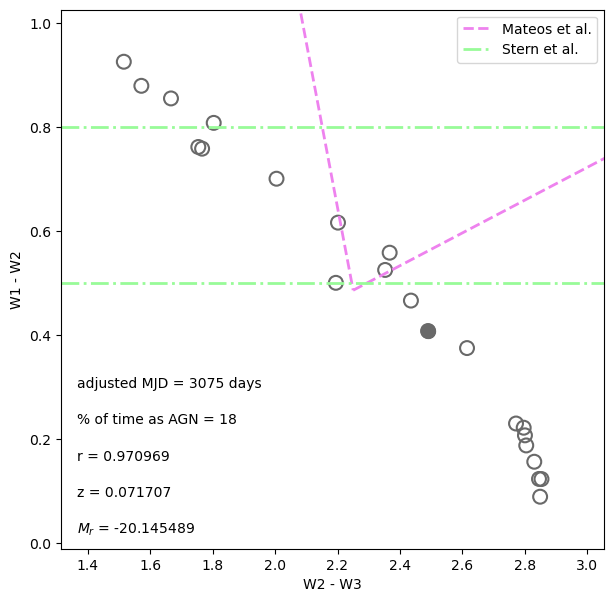

In [10]:
# Make the animated color-color diagram! Refer to the Functions file for custom functions.

# Enter the tag/ID for the galaxy you want to plot. This galaxy is a wall galaxy.
t = 552295

full = walls_full

# Find all of the W1 and W2 measurements for the galaxy of interest. Then, bin the measurements into 10-day bins
# and find the mean of each bin (we only include the mean colors of the bins in the animation).
full_tag = expand_cols(full, t)
mean = save_binned(full_tag, t)

test_colors = walls_test[(walls_test['object_tag'] == t)]

# Find the Pearson r coefficient, redshift, and absolute r-band magnitude for the galaxy of interest.
test_r = test_colors['Pr'].to_string(index = False)
test_z = test_colors['Z'].to_string(index = False)
test_Mr = test_colors['rabsmag_NSA'].to_string(index = False)

fig, ax = plt.subplots(figsize = (7, 7))

ax.set_ylabel('W1 - W2')
ax.set_xlabel('W2 - W3')

# Plot the line segments that make up the AGN wedge in Mateos et al. 2012.
xp1 = np.linspace(1.958, 6.9, 100)
xp2 = np.linspace(2.25, 6.9, 100) # ~ 2.157 (Mateos et al.)
xp3 = np.linspace(1.958, 2.25, 100)
yp1 = (0.315 * xp1) + 0.796
yp2 = (0.315 * xp2) - 0.222
yp3 = (-3.172 * xp3) + 7.624
ax.plot(xp1, yp1, color = 'violet', linestyle = 'dashed', linewidth = 2, label = 'Mateos et al.')
ax.plot(xp2, yp2, color = 'violet', linestyle = 'dashed', linewidth = 2)
ax.plot(xp3, yp3, color = 'violet', linestyle = 'dashed', linewidth = 2)

# Plot the AGN selection lines as in Stern et al. 2012.
ax.axhline(y = 0.8, color = 'palegreen', linestyle = 'dashdot', linewidth = 2, label = 'Stern et al.')
ax.axhline(y = 0.5, color = 'palegreen', linestyle = 'dashdot', linewidth = 2)

ax.legend(loc = 'upper right')

# Set up the values that will change during different frames of the animation. 
y = mean[(mean['object_tag'] == t)]['mean_color'] # We plot W1-W2 on the y-axis.
x = mean[(mean['object_tag'] == t)]['mean_W2'] # For now, we plot W2 on the x-axis. Later, we will subtract W3.
W3 = float(test_colors['w3mpro'])

# Plot all of the locations of the galaxy (over the course of its light curve) on the color-color diagram.
# We plot these as rings, while the "current" location of the galaxy during its progression is a filled circle.
ax.scatter(x.subtract(W3), y, s = 100, facecolors = 'none', marker = "o", edgecolors = 'dimgrey', linewidths = 1.5)

# Plot a sample dot that we can later animate.
scat = ax.scatter(1, 0, color = 'dimgrey', s = 100)

# Create a list of the MJDs of the centers of the bins of the galaxy's light curve. Label this MJD on the plot.
mjd = mean[(mean['object_tag'] == t)]['mjd_binned']
label = ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.21, 'MJD = ' + str(54524), fontdict = None, c = 'black', ha = 'left')

# For reference, we plot the Redshift, absolute r magnitude, and Pearson r coefficient of the galaxy.
# We also plot the percent of the binned measurements that are above the Stern et. al. 0.8 W1-W2 line.
ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.14, '% of time as AGN = ' + get_percent(mean, 'mean_color', '>=', 0.8, False)[:-10], fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() + 0.07, 'r = ' + test_r, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.00, 'z = ' + test_z, fontdict = None, ha = 'left')
ax.text(x.subtract(W3).min() - 0.15, y.min() - 0.07, '$M_{r}$ = ' + test_Mr, fontdict = None, ha = 'left')

# Automatically define the plot bounds based on the galaxy's light curve.
ax.set_ylim([y.min() - 0.1, y.max() + 0.1])
ax.set_xlim([x.subtract(W3).min() - 0.2, x.subtract(W3).max() + 0.2])

# Animate! Adjust the colors and binned MJD of the galaxy for each bin in its light curve.
def animate(i):
    scat.set_offsets((x.subtract(W3)[i], y[i]))
    label.set_text('adjusted MJD = ' + str(int(mjd[i])) + ' days')
    return scat,

# Loop the animation. Use Pillow to save it as a GIF. I believe "fps" or "intrval" changes how fast the frames go.
ani = animation.FuncAnimation(fig, animate, repeat = True,
                                    frames = len(y) -  1, interval = 50)
writer = animation.PillowWriter(fps = 3,
                                metadata = dict(artist='Me'),
                                bitrate = 1800)
ani.save('iPoster-Emily.gif', writer = writer, dpi = 600)

# Show the plot! Jupyter Notebook only shows one frame of the animation, so look in your files for the full GIF.
plt.show()